In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gradient.dumb_gradient import DumbGradientDescent 
from test_functions import f1

stopped by x convergence
x =  [1.72727273 0.45454545] ;    f(x) =  140


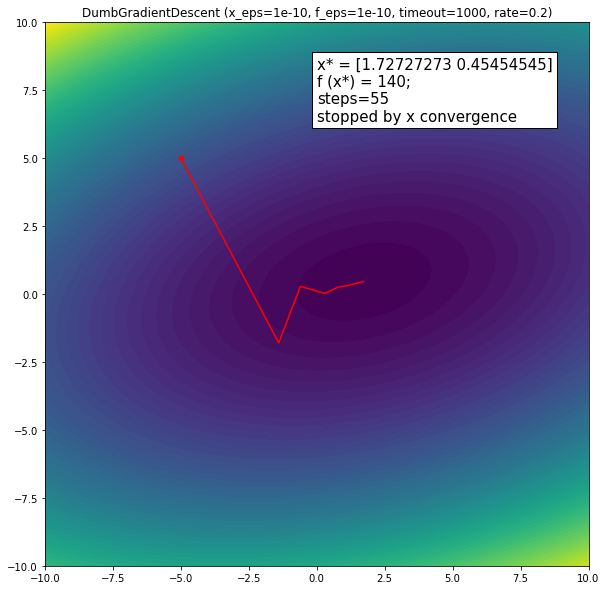

In [7]:
# Визначаємо метод оптимізації
method = DumbGradientDescent(timeout=1000, rate=0.2)
# Оптимізуємо. Зберігаємо результат. (див. файл dumb_gradient.py щоб подивитися, що містить result)
result = method.optimize(f1, f1.df, x_start=(-5,5))

# Беремо з результату послідовності {x_n}, {y_n}:
#   `result['x_history']` - це послідовність {(x_n, y_n)} - матриця (n, 2)
#   `result['x_history'].T` - це транспонування матриці - маємо матрицю (2, n)
# В `x_history` потрапить перший рядок, в `y_history` - другий рядок
x_history, y_history = result['x_history'].T

# створюємо двовимірний "лінійний простір" з двох одновимірних
# np.linspace(x0, x1, n) = { x0 + k * (x1-x0)/n | k = [0,n] } 
ls = np.linspace(-10,10,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

# gcf - get current figure - об'єкт для керування зображенням
# gca - get current axes - об'єкт для керування осями та графіком
fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-10,10) # межі по x
ax.set_ylim(-10,10) # межі по y
fig.set_size_inches((10,10)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f1([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
plt.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
plt.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

# Текст з описом результатів спуску
plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

# Додаткова детальна інформація текстом
print(result['message'])
print("x = ", result['x'], ";    f(x) = ", result['f'])
